# Computer Vision Masterclass - Autoencoders for image compression

### Importing the libraries

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

### Loading the dataset

- Dataset: https://keras.io/api/datasets/cifar10/ and https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

### Visualizing the images

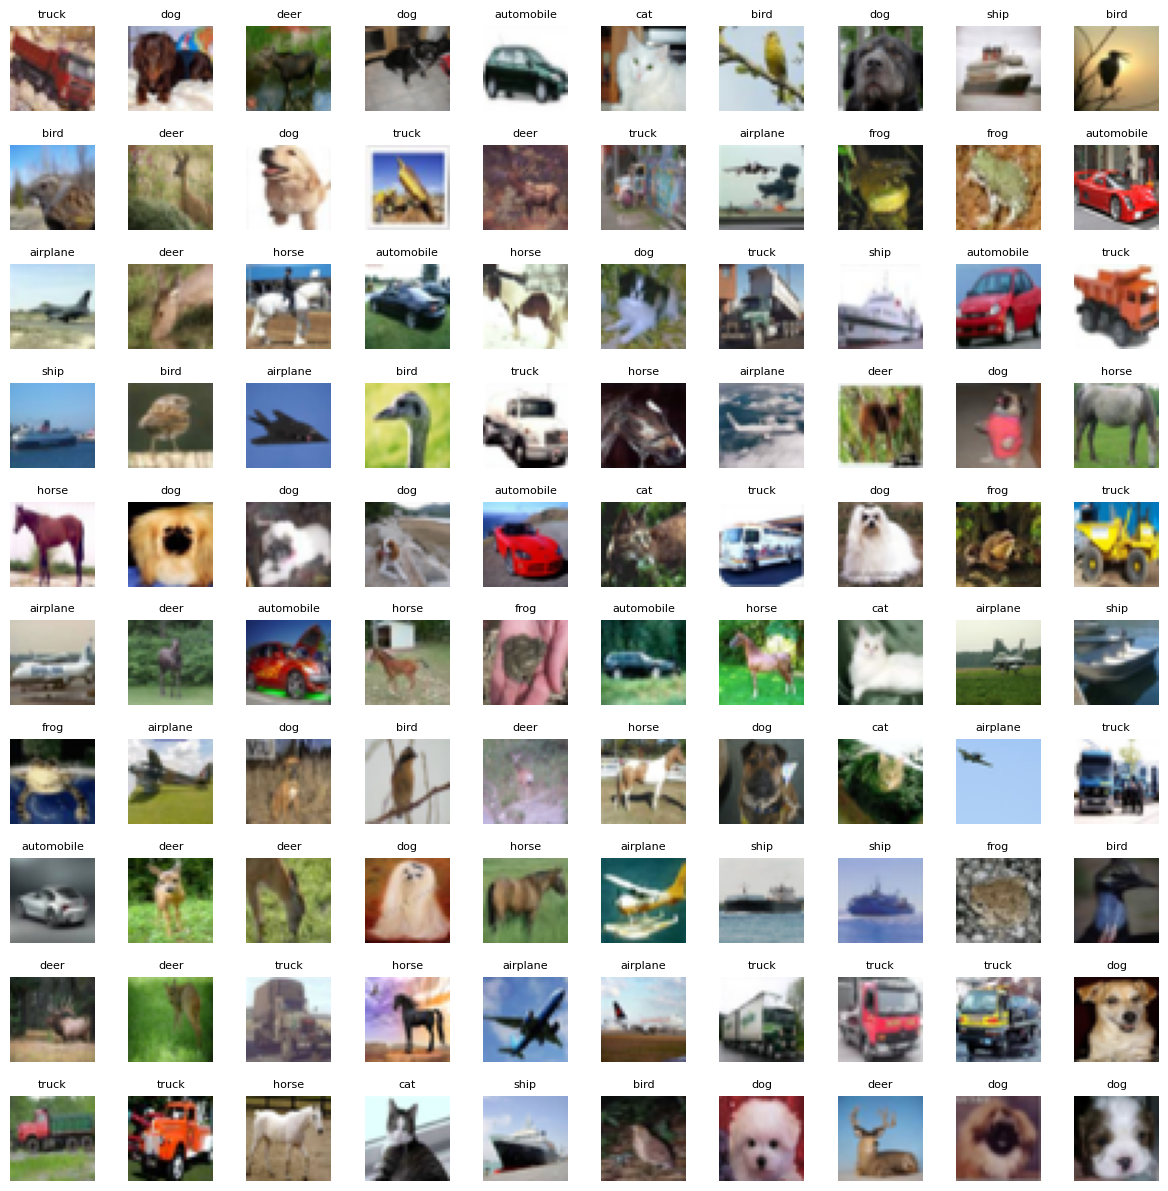

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))
axes = axes.ravel()
for i in np.arange(0, width * height):
  index = np.random.randint(0, X_train.shape[0]-1)
  axes[i].imshow(X_train[index], cmap='gray')
  axes[i].set_title(classes[y_train[index][0]], fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [7]:
X_train = X_train / 255
X_test = X_test / 255

### Building and training the convolutional autoencoder

In [8]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Decoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=3, kernel_size=(3,3), activation='sigmoid', padding='same'))


autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                        

In [9]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 23s 11ms/step - loss: 0.5846 - accuracy: 0.6405
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5732 - accuracy: 0.7026
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5701 - accuracy: 0.7181
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5685 - accuracy: 0.7263
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5675 - accuracy: 0.7320
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5667 - accuracy: 0.7360
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5661 - accuracy: 0.7393
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5656 - accuracy: 0.7409
Epoch 9/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5653 - accuracy: 0.7436
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - 

### Encoding and decoding the test images

In [11]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[8].output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128   

In [12]:
encoded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
encoded_test_images.shape

(10000, 4, 4, 16)

In [14]:
decoded_test_images = autoencoder.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [15]:
decoded_test_images.shape

(10000, 32, 32, 3)

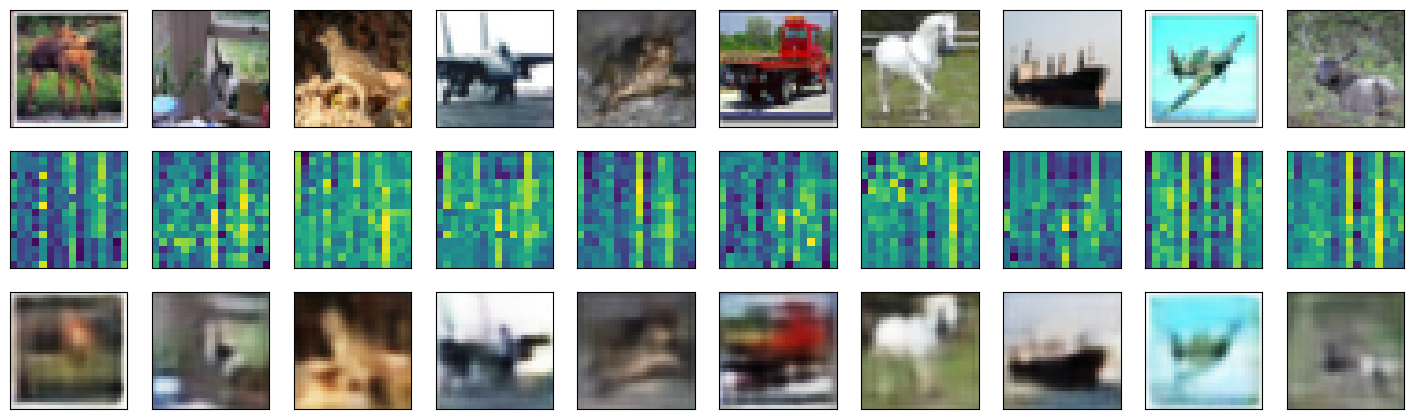

In [16]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index])
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(encoded_test_images[image_index].reshape(16, 16))
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index])
  plt.xticks(())
  plt.yticks(())